# Name:Anish Bahadur Karki <br>
# University Id: 2329231

# 1. Image Classification with Convolutional Neural Network

---




# **Introduction**

### In this project, we developed an image classification system using Convolutional Neural Networks (CNNs) to recognize hand sign language gestures. We explored different models, including custom CNNs and transfer learning with MobileNetV2, to evaluate performance across architectures.

# Dataset

### We used a Sign Language Detection dataset containing color images of hand signs, organized into labeled folders. The dataset includes separate training and test directories, with images classified into multiple gesture categories. All images were resized to 64x64 pixels and normalized for model input.

# Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import random
import cv2  # Import OpenCV for image processing
from PIL import Image # Import Pillow
import time
from collections import Counter


import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l1
# from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, AveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

## Loading Data

In [ ]:
# Define paths
train_dir = '/content/drive/MyDrive/AI Datasets/Sign Language Detection/Train'
test_dir = '/content/drive/MyDrive/AI Datasets/Sign Language Detection/Test'

In [ ]:
# Define image size
img_height, img_width = 128, 128

In [ ]:
# Function to load images and labels using PIL
def load_images_from_folder(folder):
    images = []
    labels = []
    class_names = sorted(os.listdir(folder))  # Sorted class names (digit_0, digit_1, ...)
    class_map = {name: i for i, name in enumerate(class_names)}  # Map class names to labels
    for class_name in class_names:
        class_path = os.path.join(folder, class_name)
        if not os.path.isdir(class_path):
            continue
        label = class_map[class_name]
        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # Ensure valid image format
                try:
                    img = Image.open(img_path).convert("RGB")  # Ensure image has 3 channels
                    img = img.resize((img_width, img_height))
                    images.append(np.array(img))  # Convert to numpy array
                    labels.append(label)
                except Exception as e:
                    print(f"Error loading image {img_path}: {e}")
    return np.array(images), np.array(labels)

In [ ]:
# Load training and testing datasets
x_train, y_train = load_images_from_folder(train_dir)
x_test, y_test = load_images_from_folder(test_dir)


### 1.1.1. Data Understanding, Analysis, Visualization and Cleaning

In [ ]:
# Function to count images in a directory
def count_images(directory):
    image_count = 0
    for root, _, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_count += 1
    return image_count

# Count images in train and test directories
train_image_count = count_images(train_dir)
test_image_count = count_images(test_dir)

print(f"Total images in train folder: {train_image_count}")
print(f"Total images in test folder: {test_image_count}")

Total images in train folder: 8648
Total images in test folder: 2147


In [ ]:
if os.path.exists(train_dir):
    # Check dataset structure
    classes = os.listdir(train_dir)
    print("Classes found in the dataset: \n")
    for i, class_name in enumerate(classes):
        print(f"{i + 1}. {class_name}")
    print("\n")

Classes found in the dataset: 

1. 34
2. 5
3. 7
4. 37
5. 4
6. 9
7. 6
8. 35
9. 8
10. 36
11. 33
12. 24
13. 28
14. 3
15. 29
16. 30
17. 25
18. 31
19. 32
20. 26
21. 27
22. 23
23. 20
24. 21
25. 2
26. 19
27. 18
28. 15
29. 17
30. 22
31. 16
32. 14
33. 10
34. 12
35. 13
36. 1
37. 11
38. 0




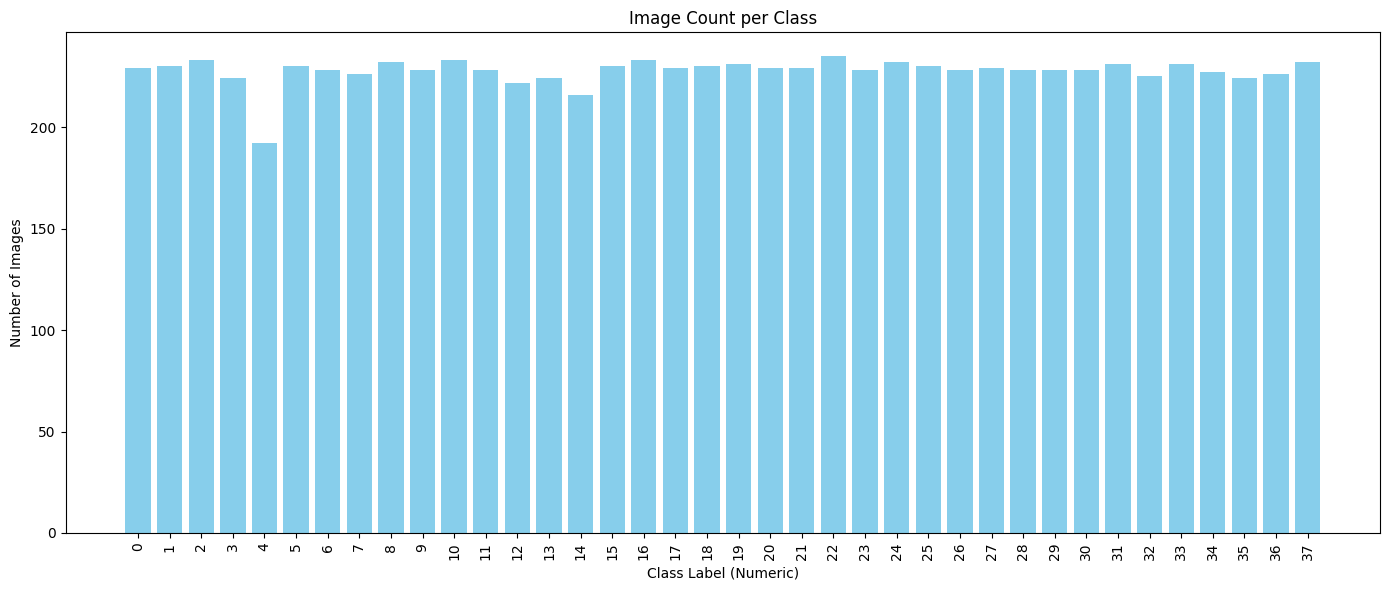

In [ ]:
import os
import matplotlib.pyplot as plt

train_dir = '/content/drive/MyDrive/AI Datasets/Sign Language Detection/Train'  # <-- Replace with your actual path

# Get only folders, assuming each class is a folder named numerically
classes = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]
classes = sorted(classes, key=lambda x: int(x))  # Sort numerically

# Count images in each class
class_counts = {}
for class_name in classes:
    class_dir = os.path.join(train_dir, class_name)
    image_files = os.listdir(class_dir)
    class_counts[class_name] = len(image_files)

# Plot the bar graph
plt.figure(figsize=(14, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xlabel('Class Label (Numeric)')
plt.ylabel('Number of Images')
plt.title('Image Count per Class')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
for class_name in classes:
        class_dir = os.path.join(train_dir, class_name)
        image_files = os.listdir(class_dir)
        print(f"Class: {class_name}, Number of images: {len(image_files)}")

Class: 34, Number of images: 227
Class: 5, Number of images: 230
Class: 7, Number of images: 226
Class: 37, Number of images: 232
Class: 4, Number of images: 192
Class: 9, Number of images: 228
Class: 6, Number of images: 228
Class: 35, Number of images: 224
Class: 8, Number of images: 232
Class: 36, Number of images: 226
Class: 33, Number of images: 231
Class: 24, Number of images: 232
Class: 28, Number of images: 228
Class: 3, Number of images: 224
Class: 29, Number of images: 228
Class: 30, Number of images: 228
Class: 25, Number of images: 230
Class: 31, Number of images: 231
Class: 32, Number of images: 225
Class: 26, Number of images: 228
Class: 27, Number of images: 229
Class: 23, Number of images: 228
Class: 20, Number of images: 229
Class: 21, Number of images: 229
Class: 2, Number of images: 233
Class: 19, Number of images: 231
Class: 18, Number of images: 230
Class: 15, Number of images: 230
Class: 17, Number of images: 229
Class: 22, Number of images: 235
Class: 16, Number 

In [ ]:
# Check for corrupt Images in train
def check_corrupted_images(dir):
  sub_dir = [d for d in os.listdir(dir)]
  for dir in sub_dir:
    class_path = os.path.join(train_dir, dir)
    image_files = [f for f in os.listdir(class_path)]
    for image in image_files:
      image = os.path.join(class_path, image)
      try:
          with Image.open(image) as img:
              img.verify()
      except (IOError, SyntaxError) as e:
          os.remove(image)
          print(f"Removed corrupted image: {image}")
  print("No corrupted images found.")

check_corrupted_images(train_dir)

No corrupted images found.


In [ ]:
# Assuming 'train_dir' is the path to your training data directory
for class_name in os.listdir(train_dir):
    class_dir = os.path.join(train_dir, class_name)
    image_files = os.listdir(class_dir)

    # Create a subsection for the current class
    fig, axes = plt.subplots(1, 4, figsize=(15, 5))
    fig.suptitle(f"Class: {class_name}", fontsize=16)

    # Display 4 random images for the class
    for i in range(4):
        # Get a random image index
        random_index = random.randint(0, len(image_files) - 1)
        image_path = os.path.join(class_dir, image_files[random_index])
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        axes[i].imshow(image)
        axes[i].set_title(f"Image {i + 1}")
        axes[i].axis("off")

    plt.show()

#Data Preprocessing

In [ ]:
# Desired image height and width
img_shape = (img_height, img_width,3)
batch_size = 32   # Number of images per batch
validation_split = 0.2  # 20% data for validation train testing
epochs= 20

In [ ]:
rescale = tf.keras.layers.Rescaling(1./255)  # Normalize pixel values to [0, 1]

## Train-Val-Test split


Split the data for model training

In [ ]:
rescale = tf.keras.layers.Rescaling(1./255)  # Normalize pixel values to [0, 1]

# Create training dataset with normalization
train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,  # Replace with the actual path to your training data directory
    image_size=(img_height, img_width),
    batch_size=batch_size,
    validation_split=validation_split,
    subset='both',
    seed=123
)

# # Apply the normalization (Rescaling) to the validation dataset
val_ds = val_ds.map(lambda x, y: (rescale(x), y))
train_ds = train_ds.map(lambda x, y: (rescale(x), y))


# Create validation dataset with normalization
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,  # Replace with the actual path to your training data directory
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False,
    seed=123
)

# Apply the normalization (Rescaling) to the validation dataset
test_ds = test_ds.map(lambda x, y: (rescale(x), y))

Found 8648 files belonging to 38 classes.
Using 6919 files for training.
Using 1729 files for validation.
Found 2147 files belonging to 38 classes.


# Visualising Images from each Class

In [ ]:
import matplotlib.pyplot as plt
import random
import cv2
import os

# Assuming 'test_dir' is the path to your test data directory
for class_name in os.listdir(test_dir):
    class_dir = os.path.join(test_dir, class_name)
    image_files = os.listdir(class_dir)

    # Create a subsection for the current class
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    fig.suptitle(f"Class: {class_name}", fontsize=16)

    # Display 2 random images for the class
    for i in range(2):
        # Get a random image index
        random_index = random.randint(0, len(image_files) - 1)
        image_path = os.path.join(class_dir, image_files[random_index])
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        axes[i].imshow(image)
        axes[i].set_title(f"Image {i + 1}")
        axes[i].axis("off")

    plt.show()


## Design, Train, and Evaluate a Baseline Model

CNN Basic Architecture
- Filters: 32, (3x3)
- Activation ReLu
- Max Pooling: (2,2)
- Stride: Pooling(2), Filter(1)
- FCN
 - Activation: ReLu
 - Output: 38 classes, Softmax

In [ ]:
# Sequential Keras CNN Model

cnn_model = keras.Sequential([
    # Convolutional layers with pooling
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=img_shape),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten the output for the fully connected layers
    layers.Flatten(),

    # Fully connected layers
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),

    # Output layer for classification
    layers.Dense(38, activation='softmax')  # 38 classes
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Compiling a model defines a model architecture's working rules while training it.<br>
For our code, we test<br>
* Optimizer defines weight update to minimize loss
* loss is a numeric value of difference of predicted value from real value
* metrics returns a evaluation value from model while testing

For the values,
* "adam" optimiser is a adaptive optimiser which tracks momentum and auto adjusts the changes it requires.
* "sparse categotical crossentropy" is used for multi-class classification when target labels are integers but not one hot encoded tho.
* "accuracy" tells the percentage of correct predictions.

In [ ]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 38)             │         1,254 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,316,230 (12.65 MB)

 Trainable params: 3,316,230 (12.65 MB)

 Non-trainable params: 0 (0.00 B)

### Model Training

In [ ]:
callback_base = [
    # Save the best model based on validation accuracy
    ModelCheckpoint(
        'best_base_model.keras',  # Path to save the best model
        save_best_only=True,  # Save only the best model
        monitor='val_loss',  # Monitor validation loss
        mode='min',  # Minimize the validation loss
        verbose=1
    ),
    # Stop training if validation loss doesn't improve for 10 epochs
    EarlyStopping(
        monitor='val_loss',  # Monitor validation loss
        patience=10,  # Wait for 10 epochs before stopping
        restore_best_weights=True,  # Restore best weights after stopping
        verbose=1
    )
]

In [ ]:
# Time the training process for the basic CNN model
start_time = time.time()
history = cnn_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    batch_size=batch_size,
    callbacks=callback_base
)
end_time = time.time()
training_time_basic = end_time - start_time
print(f"Training time for basic CNN model: {training_time_basic:.2f} seconds")

Epoch 1/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.0204 - loss: 3.6431
Epoch 1: val_loss improved from inf to 3.63798, saving model to best_base_model.keras
217/217 ━━━━━━━━━━━━━━━━━━━━ 32s 122ms/step - accuracy: 0.0204 - loss: 3.6431 - val_accuracy: 0.0243 - val_loss: 3.6380
Epoch 2/20
216/217 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.0315 - loss: 3.6389
Epoch 2: val_loss improved from 3.63798 to 3.63645, saving model to best_base_model.keras
217/217 ━━━━━━━━━━━━━━━━━━━━ 24s 113ms/step - accuracy: 0.0315 - loss: 3.6389 - val_accuracy: 0.0330 - val_loss: 3.6364
Epoch 3/20
216/217 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.0576 - loss: 3.5538
Epoch 3: val_loss improved from 3.63645 to 3.13606, saving model to best_base_model.keras
217/217 ━━━━━━━━━━━━━━━━━━━━ 39s 103ms/step - accuracy: 0.0579 - loss: 3.5526 - val_accuracy: 0.1446 - val_loss: 3.1361
Epoch 4/20
216/217 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.1729 - loss: 2.9758
Epoch 4: val_loss improved

### Model Evaluation

In [ ]:
# Evaluate the model on the test dataset
cnn_test_loss, cnn_test_accuracy = cnn_model.evaluate(test_ds)
print(f"\n\nTest Loss: {cnn_test_loss:.4f}, Test Accuracy: {cnn_test_accuracy:.4f}")

68/68 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - accuracy: 0.5299 - loss: 1.7737


Test Loss: 1.6420, Test Accuracy: 0.5543


In [ ]:
# Get predictions from the model on the test dataset
y_pred = cnn_model.predict(test_ds)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true labels from the test dataset
y_true = np.concatenate([y for x, y in test_ds], axis=0)

# Generate and print the classification report
print(classification_report(y_true, y_pred_classes))


68/68 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step
              precision    recall  f1-score   support

           0       0.73      0.32      0.44        60
           1       0.60      0.82      0.70        57
           2       0.77      0.52      0.62        58
           3       0.70      0.82      0.75        56
           4       0.51      0.53      0.52        55
           5       0.43      0.18      0.26        55
           6       0.32      0.39      0.35        54
           7       0.50      0.30      0.37        57
           8       0.60      0.59      0.59        58
           9       0.83      0.67      0.74        57
          10       0.36      0.53      0.43        57
          11       0.38      0.51      0.44        57
          12       0.64      0.47      0.54        58
          13       0.46      0.42      0.44        57
          14       0.62      0.68      0.65        57
          15       0.46      0.67      0.55        58
          16       0.52      0.39      0.

68/68 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step


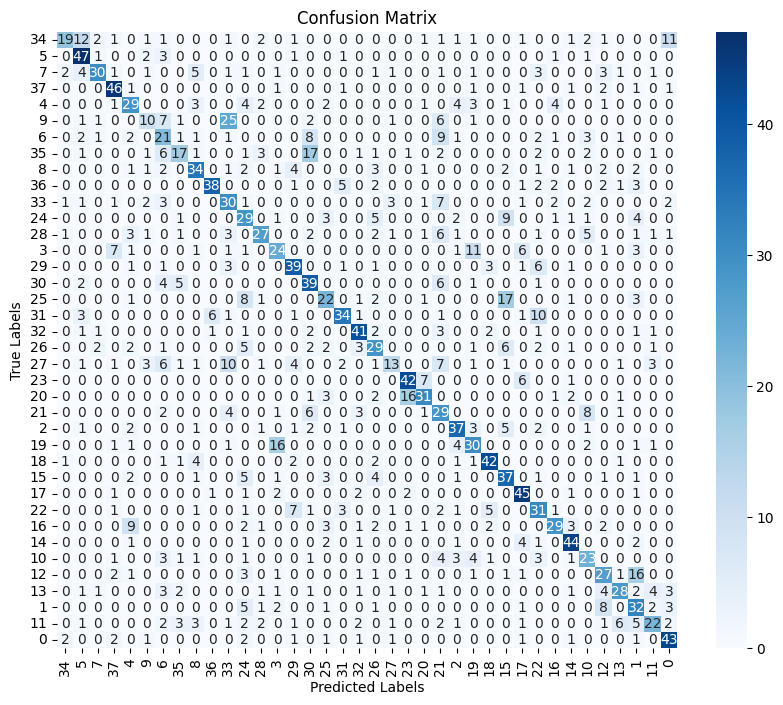

In [ ]:
#Inspect some misclassified examples.
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

predictions = cnn_model.predict(test_ds)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.concatenate([y for x, y in test_ds], axis=0)

cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

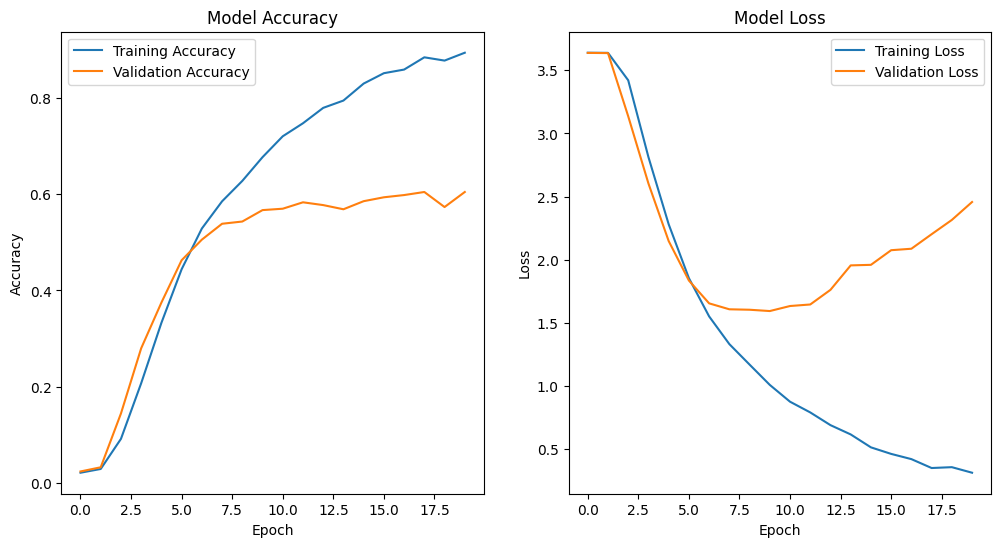

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

##  Design, Train , and Evaluate Deeper Architecture with Regularization Layer

Augment the data for more accurate training

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])


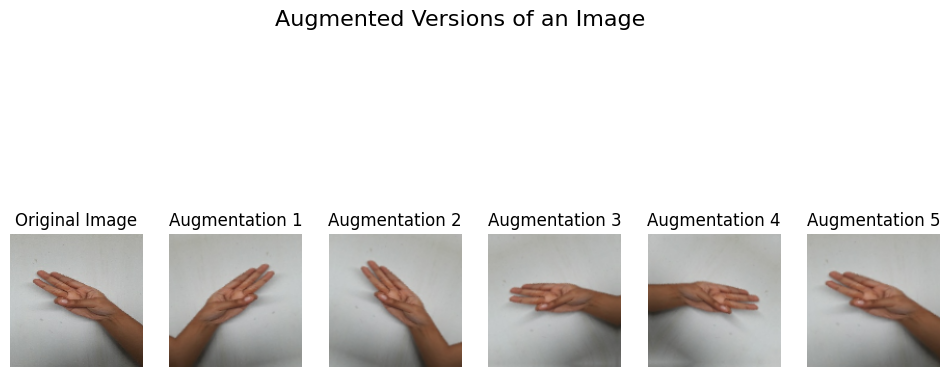

In [ ]:
image_batch, label_batch = next(iter(train_ds))

image_index = 0
original_image = image_batch[image_index]

num_augmentations = 5

# Create a figure and subplots
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.suptitle("Augmented Versions of an Image", fontsize=16)

# Display the original image
plt.subplot(1, num_augmentations + 1, 1)
plt.imshow((original_image.numpy() * 255).astype("uint8"))
plt.title("Original Image")
plt.axis('off')

# Display augmented versions
for i in range(num_augmentations):
    augmented_image = data_augmentation(original_image)
    augmented_image = (augmented_image.numpy() * 255).astype("uint8")
    plt.subplot(1, num_augmentations + 1, i + 2)
    plt.imshow(augmented_image)
    plt.title(f"Augmentation {i + 1}")
    plt.axis('off')

plt.show()

In [ ]:
# Define the CNN model
cnn_deeper = keras.Sequential([
    # Block 1
    layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', input_shape=img_shape),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Block 2
    layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Block 3
    layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Block 4
    layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Block 5
    layers.Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Flatten and Dense layers
    layers.Flatten(),
    layers.Dropout(0.5),  # Helps reduce overfitting

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),

    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),

    layers.Dense(32, activation='relu'),

    # Output layer for classification (38 classes)
    layers.Dense(38, activation='softmax')
])

In [ ]:
cnn_deeper.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
cnn_deeper.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 4, 4, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,846,406 (7.04 MB)

 Trainable params: 1,844,422 (7.04 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [ ]:
# Define the callbacks
callback_deep = [
    # Save the best model based on validation accuracy
    ModelCheckpoint(
        'best_model_deep.keras',  # Path to save the best model
        save_best_only=True,  # Save only the best model
        monitor='val_loss',  # Monitor validation loss
        mode='min',  # Minimize the validation loss
        verbose=1
    ),
    # Stop training if validation loss doesn't improve for 10 epochs
    EarlyStopping(
        monitor='val_loss',  # Monitor validation loss
        patience=10,  # Wait for 10 epochs before stopping
        restore_best_weights=True,  # Restore best weights after stopping
        verbose=1
    )
]

In [ ]:
# Time the training process for the deeper CNN model
start_time = time.time()
history_deeper = cnn_deeper.fit(
    train_ds,
    validation_data=val_ds,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callback_deep
)
end_time = time.time()
training_time_deeper = end_time - start_time
print(f"Training time for deeper CNN model: {training_time_deeper:.2f} seconds")

Epoch 1/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.0294 - loss: 3.8398
Epoch 1: val_loss improved from inf to 3.68283, saving model to best_model_deep.keras
217/217 ━━━━━━━━━━━━━━━━━━━━ 39s 137ms/step - accuracy: 0.0294 - loss: 3.8391 - val_accuracy: 0.0463 - val_loss: 3.6828
Epoch 2/20
216/217 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.0678 - loss: 3.5041
Epoch 2: val_loss improved from 3.68283 to 3.29122, saving model to best_model_deep.keras
217/217 ━━━━━━━━━━━━━━━━━━━━ 24s 111ms/step - accuracy: 0.0679 - loss: 3.5036 - val_accuracy: 0.1203 - val_loss: 3.2912
Epoch 3/20
216/217 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.1150 - loss: 3.2410
Epoch 3: val_loss improved from 3.29122 to 2.94915, saving model to best_model_deep.keras
217/217 ━━━━━━━━━━━━━━━━━━━━ 41s 111ms/step - accuracy: 0.1151 - loss: 3.2403 - val_accuracy: 0.1683 - val_loss: 2.9491
Epoch 4/20
216/217 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.1549 - loss: 2.9930
Epoch 4: val_loss improve

In [ ]:
# Evaluate the model on the test dataset
deeper_test_loss, deeper_test_accuracy = cnn_deeper.evaluate(test_ds)
print(f"\n\nTest Loss: {deeper_test_loss:.4f}, Test Accuracy: {deeper_test_accuracy:.4f}")

68/68 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - accuracy: 0.7890 - loss: 0.7273


Test Loss: 0.6832, Test Accuracy: 0.8048


In [ ]:
# Get predictions from the model on the test dataset
y_pred = cnn_deeper.predict(test_ds)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true labels from the test dataset
y_true = np.concatenate([y for x, y in test_ds], axis=0)

# Generate and print the classification report
print(classification_report(y_true, y_pred_classes))

68/68 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        60
           1       0.92      0.84      0.88        57
           2       0.93      0.69      0.79        58
           3       0.90      0.82      0.86        56
           4       0.84      0.87      0.86        55
           5       0.76      0.51      0.61        55
           6       0.79      0.81      0.80        54
           7       0.62      0.77      0.69        57
           8       0.69      0.90      0.78        58
           9       0.83      0.91      0.87        57
          10       0.62      0.79      0.70        57
          11       0.70      0.65      0.67        57
          12       0.82      0.91      0.86        58
          13       0.85      0.88      0.86        57
          14       0.89      0.82      0.85        57
          15       0.85      0.78      0.81        58
          16       0.55      0.19      0.

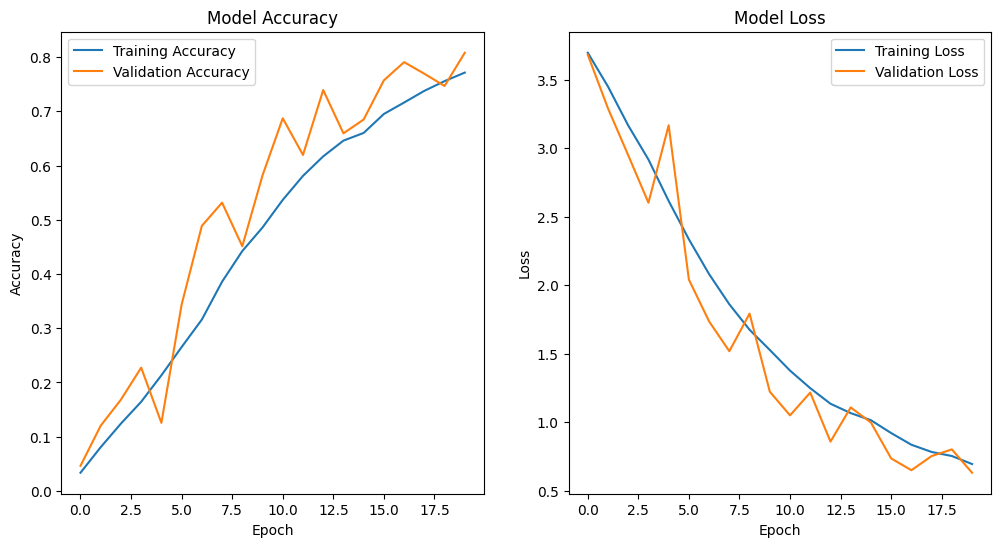

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_deeper.history['accuracy'], label='Training Accuracy')
plt.plot(history_deeper.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history_deeper.history['loss'], label='Training Loss')
plt.plot(history_deeper.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

68/68 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step


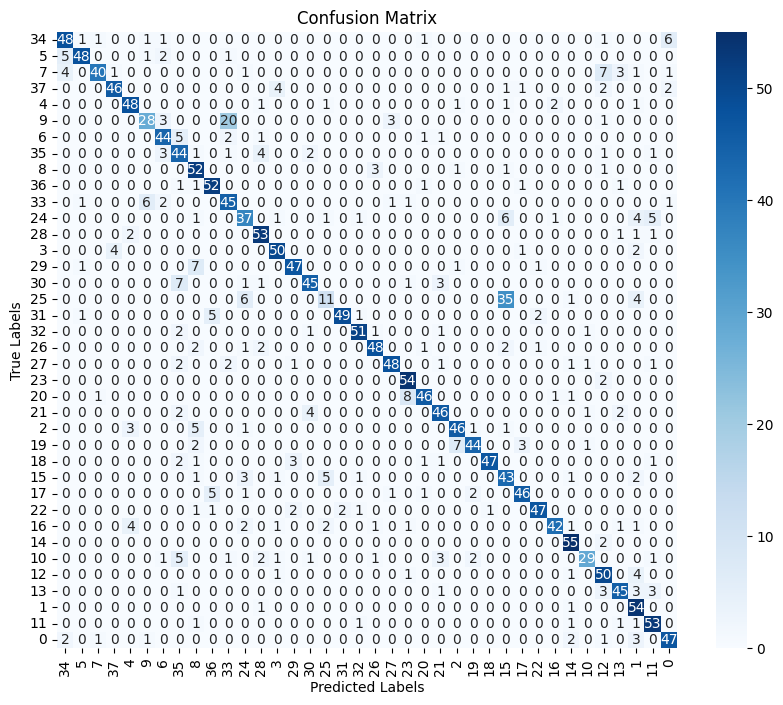

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

predictions = cnn_deeper.predict(test_ds)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.concatenate([y for x, y in test_ds], axis=0)

cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
predicted_class_counts = Counter(predicted_classes)

for class_index, count in predicted_class_counts.items():
    class_name = classes[class_index]  # Get the class name from the 'classes' list
    print(f"{count} {class_name} predicted.")


52 20 predicted.
56 6 predicted.
59 34 predicted.
57 0 predicted.
52 5 predicted.
43 7 predicted.
37 9 predicted.
71 12 predicted.
72 33 predicted.
54 13 predicted.
51 37 predicted.
53 24 predicted.
81 1 predicted.
59 3 predicted.
52 17 predicted.
90 15 predicted.
57 4 predicted.
56 2 predicted.
65 28 predicted.
46 16 predicted.
20 25 predicted.
53 27 predicted.
71 35 predicted.
57 21 predicted.
53 30 predicted.
75 8 predicted.
66 11 predicted.
54 26 predicted.
63 36 predicted.
66 23 predicted.
56 32 predicted.
53 29 predicted.
51 22 predicted.
65 14 predicted.
51 31 predicted.
33 10 predicted.
49 19 predicted.
48 18 predicted.


 ## Experimentation and Comparative Analysis

#### Baseline vs. Deeper Model Performance

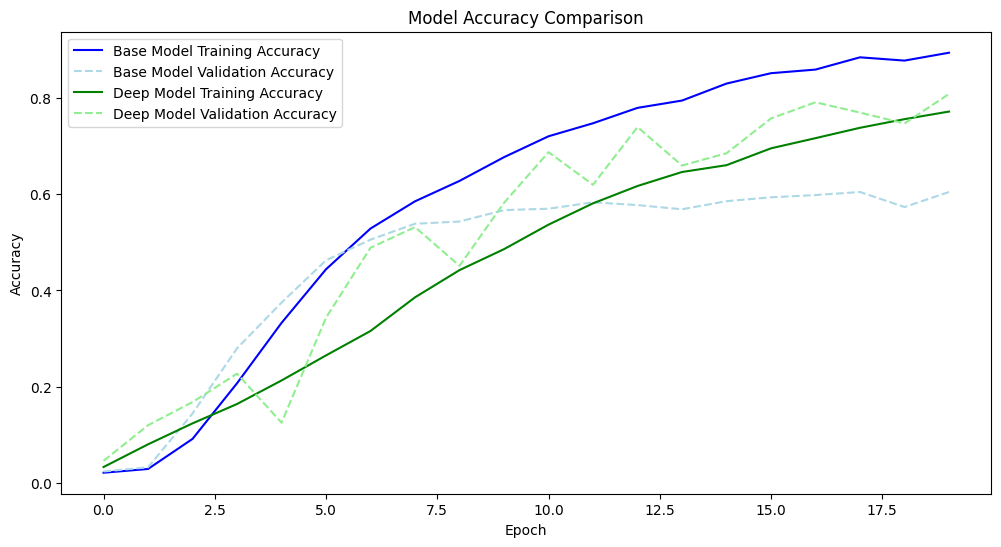

In [ ]:
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(12, 6))

# Plot the data for the base model
plt.plot(history.history['accuracy'], label='Base Model Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Base Model Validation Accuracy', color='lightblue', linestyle='--')

# Plot the data for the deep model
plt.plot(history_deeper.history['accuracy'], label='Deep Model Training Accuracy', color='green')
plt.plot(history_deeper.history['val_accuracy'], label='Deep Model Validation Accuracy', color='lightgreen', linestyle='--')

# Customize the plot
plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Show the plot
plt.show()


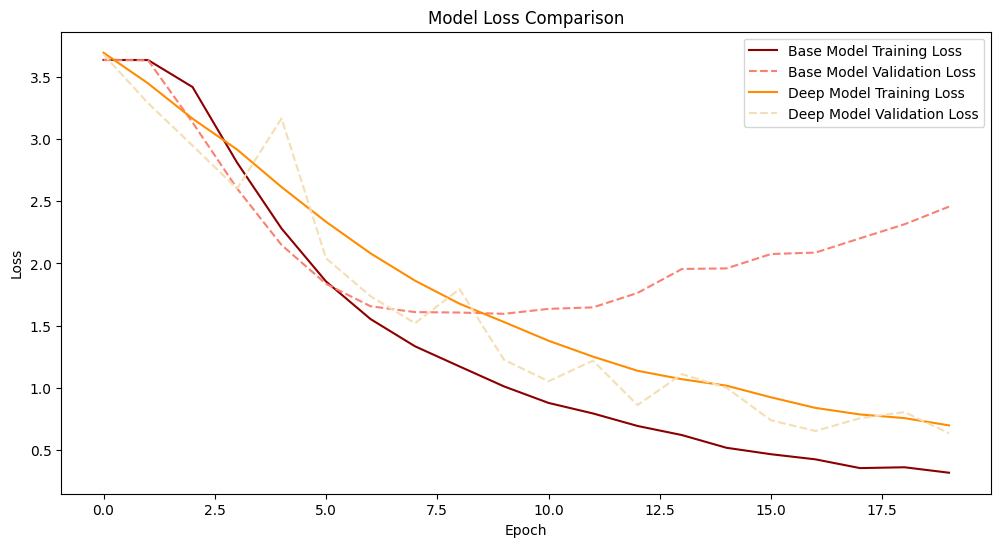

In [ ]:
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(12, 6))

# Plot the data for the base model
plt.plot(history.history['loss'], label='Base Model Training Loss', color='darkred')
plt.plot(history.history['val_loss'], label='Base Model Validation Loss', color='salmon', linestyle='--')

# Plot the data for the deep model
plt.plot(history_deeper.history['loss'], label='Deep Model Training Loss', color='darkorange')
plt.plot(history_deeper.history['val_loss'], label='Deep Model Validation Loss', color='wheat', linestyle='--')

# Customize the plot
plt.title('Model Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Show the plot
plt.show()

#### Computational Efficiency

In [ ]:
print(f"Training time for basic CNN model: {training_time_basic:.2f} seconds")
print(f"Training time for deeper CNN model: {training_time_deeper:.2f} seconds")

Training time for basic CNN model: 665.11 seconds
Training time for deeper CNN model: 657.44 seconds


#### Optimizer Analysis: SGD vs Adam

In [ ]:
from tensorflow.keras.optimizers import SGD

# Compile the model with SGD optimizer
cnn_deeper.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history_deeper_sgd = cnn_deeper.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    batch_size=batch_size,
    callbacks=callback_deep # Reuse the same callbacks
)


Epoch 1/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.6486 - loss: 1.1918
Epoch 1: val_loss did not improve from 0.63211
217/217 ━━━━━━━━━━━━━━━━━━━━ 34s 127ms/step - accuracy: 0.6486 - loss: 1.1918 - val_accuracy: 0.6113 - val_loss: 1.3663
Epoch 2/20
216/217 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.7003 - loss: 1.0065
Epoch 2: val_loss did not improve from 0.63211
217/217 ━━━━━━━━━━━━━━━━━━━━ 33s 107ms/step - accuracy: 0.7003 - loss: 1.0063 - val_accuracy: 0.4754 - val_loss: 1.9815
Epoch 3/20
216/217 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.7162 - loss: 0.9606
Epoch 3: val_loss did not improve from 0.63211
217/217 ━━━━━━━━━━━━━━━━━━━━ 24s 111ms/step - accuracy: 0.7163 - loss: 0.9604 - val_accuracy: 0.3447 - val_loss: 2.3489
Epoch 4/20
216/217 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.7352 - loss: 0.8477
Epoch 4: val_loss did not improve from 0.63211
217/217 ━━━━━━━━━━━━━━━━━━━━ 41s 112ms/step - accuracy: 0.7352 - loss: 0.8475 - val_accuracy: 0.6698 - 

68/68 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - accuracy: 0.8141 - loss: 0.6913


Test Loss (SGD): 0.5681, Test Accuracy (SGD): 0.8496
68/68 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step
              precision    recall  f1-score   support

           0       0.84      0.60      0.70        60
           1       0.83      0.91      0.87        57
           2       0.94      0.79      0.86        58
           3       0.89      0.96      0.92        56
           4       0.98      0.85      0.91        55
           5       0.90      0.65      0.76        55
           6       0.86      0.78      0.82        54
           7       0.54      0.91      0.68        57
           8       0.85      0.86      0.85        58
           9       0.93      0.91      0.92        57
          10       0.73      0.79      0.76        57
          11       0.75      0.72      0.73        57
          12       0.90      0.91      0.91        58
          13       0.88      0.91      0.90        57
          14       0

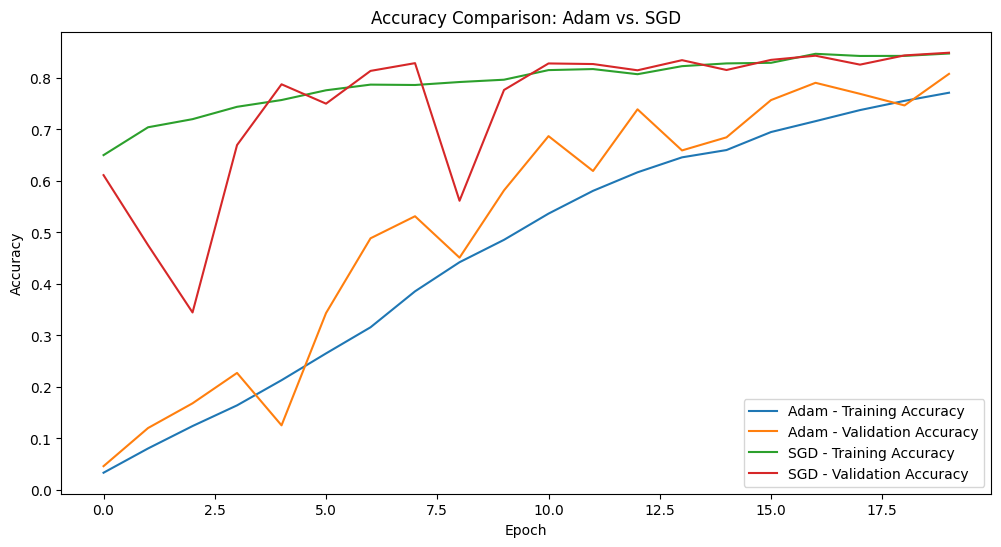

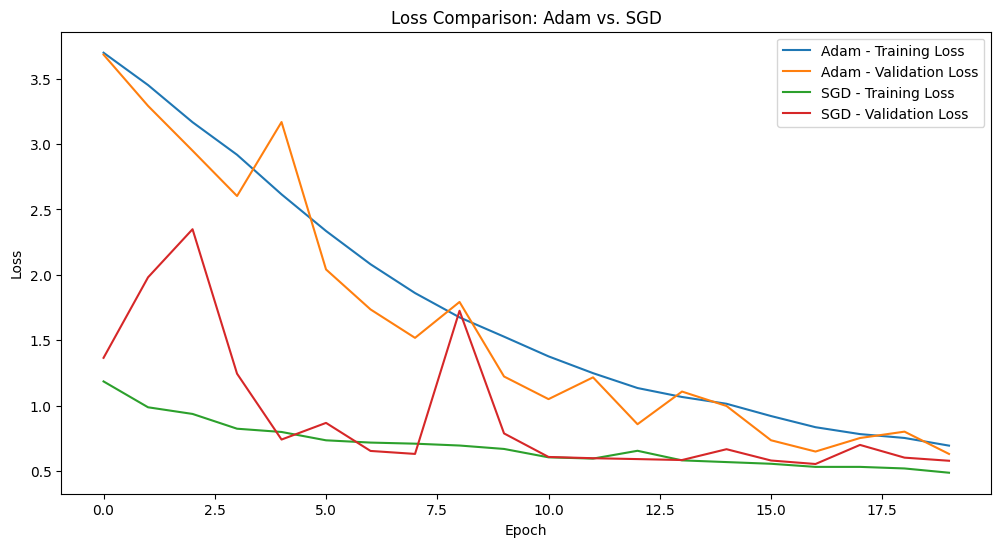


Optimizer Comparison Summary:
- Adam Test Accuracy: 0.8048
- SGD Test Accuracy: 0.8496


In [ ]:
# prompt:  Compare the impact of these optimizers on convergence speed and final performance

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from collections import Counter

# Evaluate the model with SGD optimizer on the test dataset
deeper_sgd_test_loss, deeper_sgd_test_accuracy = cnn_deeper.evaluate(test_ds)
print(f"\n\nTest Loss (SGD): {deeper_sgd_test_loss:.4f}, Test Accuracy (SGD): {deeper_sgd_test_accuracy:.4f}")

# Get predictions from the model with SGD optimizer
y_pred_sgd = cnn_deeper.predict(test_ds)
y_pred_classes_sgd = np.argmax(y_pred_sgd, axis=1)

# Generate and print the classification report for SGD
print(classification_report(y_true, y_pred_classes_sgd))


#Plot the training and validation accuracy for both optimizers
plt.figure(figsize=(12, 6))
plt.plot(history_deeper.history['accuracy'], label='Adam - Training Accuracy')
plt.plot(history_deeper.history['val_accuracy'], label='Adam - Validation Accuracy')
plt.plot(history_deeper_sgd.history['accuracy'], label='SGD - Training Accuracy')
plt.plot(history_deeper_sgd.history['val_accuracy'], label='SGD - Validation Accuracy')
plt.title('Accuracy Comparison: Adam vs. SGD')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Plot the training and validation loss for both optimizers
plt.figure(figsize=(12, 6))
plt.plot(history_deeper.history['loss'], label='Adam - Training Loss')
plt.plot(history_deeper.history['val_loss'], label='Adam - Validation Loss')
plt.plot(history_deeper_sgd.history['loss'], label='SGD - Training Loss')
plt.plot(history_deeper_sgd.history['val_loss'], label='SGD - Validation Loss')
plt.title('Loss Comparison: Adam vs. SGD')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Print a comparison summary
print("\nOptimizer Comparison Summary:")
print(f"- Adam Test Accuracy: {deeper_test_accuracy:.4f}")
print(f"- SGD Test Accuracy: {deeper_sgd_test_accuracy:.4f}")
# Analyze the plots and the test accuracies to determine which optimizer performs better.
# Adam often converges faster but might overshoot the optimal solution; SGD may be slower initially, but it can potentially achieve better performance in some cases.


## Part B: Fine-Tuning a Pre-Trained Model (Transfer Learning).

### Loading and Adapting a Pre - Trained Model

In [ ]:
# Load the base model with pretrained weights from ImageNet
base_model = MobileNetV2(input_shape=img_shape, include_top=False, weights='imagenet',pooling='max')

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Modify the Model Architecture

In [ ]:
# Build the model
transfer_model = Sequential()
transfer_model.add(base_model)
transfer_model.add(Dropout(0.35))  # Add dropout for regularization
transfer_model.add(Dense(220, activation='relu'))
transfer_model.add(Dense(60, activation='relu'))
transfer_model.add(layers.Flatten())  # Flatten before the output layer
transfer_model.add(Dense(38, activation='softmax')) # 38 output classes

In [ ]:
base_model.trainable = False  # Freeze base model

In [ ]:
transfer_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128            │ (None, 1280)           │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 220)            │       281,820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 60)             │        13,260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 60)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 38)             │         2,318 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,555,382 (9.75 MB)

 Trainable params: 297,398 (1.13 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

##  Model Training and Fine-Tuning

In [ ]:
# Define the callbacks
callback_transfer = [
    # Save the best model based on validation accuracy
    ModelCheckpoint(
        'best_model_transfer.keras',  # Path to save the best model
        save_best_only=True,  # Save only the best model
        monitor='val_loss',  # Monitor validation loss
        mode='min',  # Minimize the validation loss
        verbose=1
    ),
    # Stop training if validation loss doesn't improve for 10 epochs
    EarlyStopping(
        monitor='val_loss',  # Monitor validation loss
        patience=10,  # Wait for 10 epochs before stopping
        restore_best_weights=True,  # Restore best weights after stopping
        verbose=1
    )
]

1. Feature Extraction Strategy (Train only new layers):

In [ ]:
# Compile model
base_learning_rate = 0.001
transfer_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) # Changed loss function to 'sparse_categorical_crossentropy'

In [ ]:
start_time = time.time()
history_transfer = transfer_model.fit(
    train_ds,
    validation_data=val_ds,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callback_transfer
)
end_time = time.time()
transfer_training_time = end_time - start_time
print(f"Training time for deeper CNN model: {transfer_training_time:.2f} seconds")

Epoch 1/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.1094 - loss: 3.4230
Epoch 1: val_loss improved from inf to 1.53186, saving model to best_model_transfer.keras
217/217 ━━━━━━━━━━━━━━━━━━━━ 43s 153ms/step - accuracy: 0.1099 - loss: 3.4202 - val_accuracy: 0.5159 - val_loss: 1.5319
Epoch 2/20
216/217 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.4785 - loss: 1.6404
Epoch 2: val_loss improved from 1.53186 to 1.07774, saving model to best_model_transfer.keras
217/217 ━━━━━━━━━━━━━━━━━━━━ 27s 109ms/step - accuracy: 0.4789 - loss: 1.6389 - val_accuracy: 0.6582 - val_loss: 1.0777
Epoch 3/20
216/217 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.6100 - loss: 1.2029
Epoch 3: val_loss improved from 1.07774 to 0.99706, saving model to best_model_transfer.keras
217/217 ━━━━━━━━━━━━━━━━━━━━ 23s 107ms/step - accuracy: 0.6102 - loss: 1.2024 - val_accuracy: 0.6732 - val_loss: 0.9971
Epoch 4/20
216/217 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.6704 - loss: 1.0141
Epoch 4: val_

In [ ]:
# Evaluate the model on the test dataset
transfer_test_loss, transfer_test_accuracy = transfer_model.evaluate(test_ds)
print(f"\n\nTest Loss: {transfer_test_loss:.4f}, Test Accuracy: {transfer_test_accuracy:.4f}")

68/68 ━━━━━━━━━━━━━━━━━━━━ 8s 114ms/step - accuracy: 0.7662 - loss: 0.7812


Test Loss: 0.7110, Test Accuracy: 0.7783


In [ ]:
# Get predictions from the model on the test dataset
y_pred = transfer_model.predict(test_ds)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true labels from the test dataset
y_true = np.concatenate([y for x, y in test_ds], axis=0)

# Generate and print the classification report
print(classification_report(y_true, y_pred_classes))


68/68 ━━━━━━━━━━━━━━━━━━━━ 12s 127ms/step
              precision    recall  f1-score   support

           0       0.84      0.68      0.75        60
           1       0.84      0.93      0.88        57
           2       0.92      0.78      0.84        58
           3       0.95      0.93      0.94        56
           4       0.74      0.76      0.75        55
           5       0.63      0.71      0.67        55
           6       0.68      0.56      0.61        54
           7       0.44      0.61      0.51        57
           8       0.79      0.84      0.82        58
           9       0.88      0.88      0.88        57
          10       0.59      0.61      0.60        57
          11       0.73      0.58      0.65        57
          12       0.79      0.83      0.81        58
          13       0.87      0.91      0.89        57
          14       0.72      0.89      0.80        57
          15       0.86      0.74      0.80        58
          16       0.67      0.63      

68/68 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step


Text(0.5, 1.0, 'Confusion Matrix')

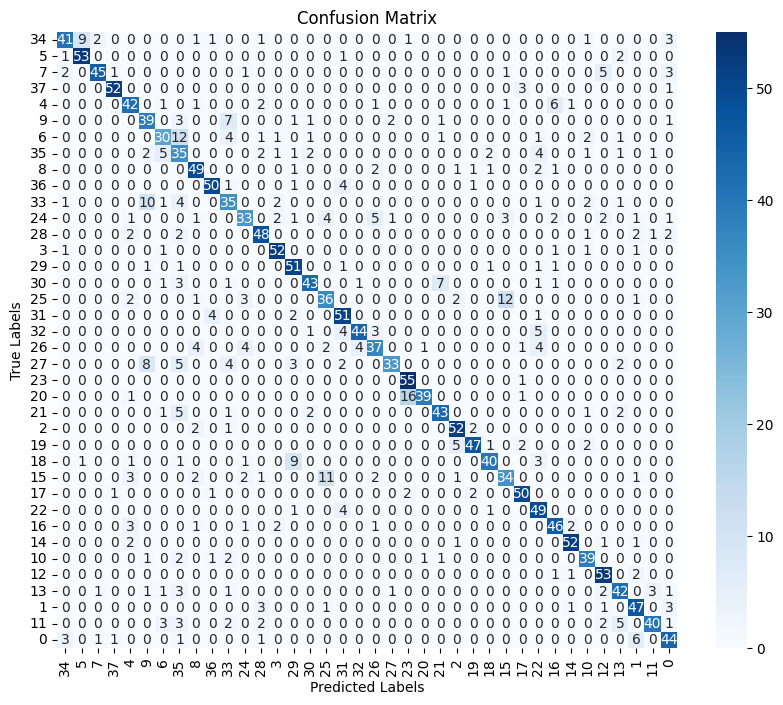

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

predictions_t = transfer_model.predict(test_ds)
predicted_classes_t = np.argmax(predictions_t, axis=1)
true_classes = np.concatenate([y for x, y in test_ds], axis=0)

cm = confusion_matrix(true_classes, predicted_classes_t)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")

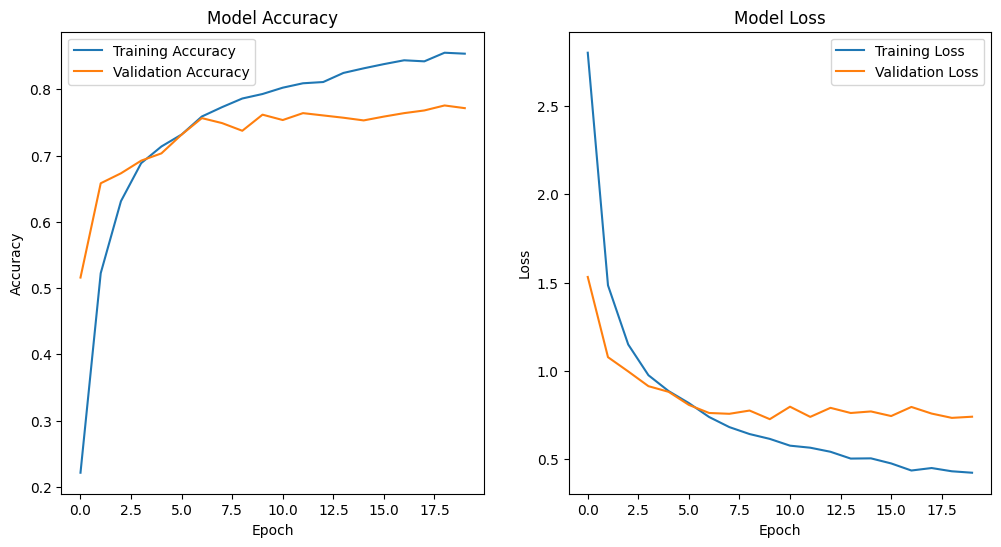

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_transfer.history['accuracy'], label='Training Accuracy')
plt.plot(history_transfer.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history_transfer.history['loss'], label='Training Loss')
plt.plot(history_transfer.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

2. Fine-Tuning Strategy (Unfreeze and use small learning rate):

In [ ]:
transfer_model.trainable = True
transfer_model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
start_time = time.time()
history_finetune = transfer_model.fit(
    train_ds,
    validation_data=val_ds,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callback_transfer
)
end_time = time.time()
fine_tune_training_time = end_time - start_time
print(f"Training time for deeper CNN model: {fine_tune_training_time:.2f} seconds")

Epoch 1/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.8152 - loss: 0.5405
Epoch 1: val_loss improved from 0.72678 to 0.69685, saving model to best_model_transfer.keras
217/217 ━━━━━━━━━━━━━━━━━━━━ 42s 150ms/step - accuracy: 0.8153 - loss: 0.5403 - val_accuracy: 0.7808 - val_loss: 0.6969
Epoch 2/20
216/217 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.8344 - loss: 0.4986
Epoch 2: val_loss improved from 0.69685 to 0.68864, saving model to best_model_transfer.keras
217/217 ━━━━━━━━━━━━━━━━━━━━ 28s 106ms/step - accuracy: 0.8344 - loss: 0.4984 - val_accuracy: 0.7877 - val_loss: 0.6886
Epoch 3/20
216/217 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.8332 - loss: 0.4919
Epoch 3: val_loss improved from 0.68864 to 0.68481, saving model to best_model_transfer.keras
217/217 ━━━━━━━━━━━━━━━━━━━━ 24s 110ms/step - accuracy: 0.8333 - loss: 0.4916 - val_accuracy: 0.7877 - val_loss: 0.6848
Epoch 4/20
216/217 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.8315 - loss: 0.4916
Epoch 4: v

In [ ]:
# Evaluate the model on the test dataset
fine_test_loss, fine_test_accuracy = transfer_model.evaluate(test_ds)
print(f"\n\nTest Loss: {fine_test_loss:.4f}, Test Accuracy: {fine_test_accuracy:.4f}")

68/68 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - accuracy: 0.7946 - loss: 0.7324


Test Loss: 0.6515, Test Accuracy: 0.8048


In [ ]:
# Get predictions from the model on the test dataset
y_pred = transfer_model.predict(test_ds)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true labels from the test dataset
y_true = np.concatenate([y for x, y in test_ds], axis=0)

# Generate and print the classification report
print(classification_report(y_true, y_pred_classes))


68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step
              precision    recall  f1-score   support

           0       0.80      0.73      0.77        60
           1       0.86      0.89      0.88        57
           2       0.88      0.76      0.81        58
           3       0.93      0.96      0.95        56
           4       0.68      0.84      0.75        55
           5       0.72      0.71      0.72        55
           6       0.74      0.72      0.73        54
           7       0.59      0.60      0.59        57
           8       0.87      0.83      0.85        58
           9       0.89      0.86      0.88        57
          10       0.63      0.60      0.61        57
          11       0.81      0.68      0.74        57
          12       0.83      0.83      0.83        58
          13       0.78      0.95      0.86        57
          14       0.89      0.89      0.89        57
          15       0.83      0.78      0.80        58
          16       0.63      0.75      0.

68/68 ━━━━━━━━━━━━━━━━━━━━ 11s 123ms/step


Text(0.5, 1.0, 'Confusion Matrix')

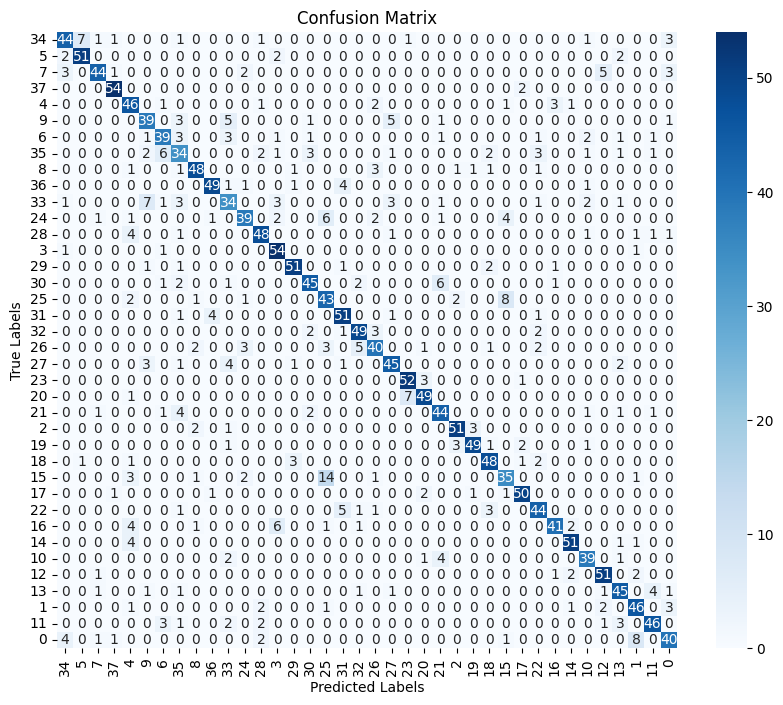

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

predictions_t = transfer_model.predict(test_ds)
predicted_classes_t = np.argmax(predictions_t, axis=1)
true_classes = np.concatenate([y for x, y in test_ds], axis=0)

cm = confusion_matrix(true_classes, predicted_classes_t)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")

In [ ]:
from collections import Counter

predicted_class_counts = Counter(predicted_classes_t)

for class_index, count in predicted_class_counts.items():
    class_name = classes[class_index]  # Get the class name from the 'classes' list
    print(f"{count} {class_name} predicted.")

74 23 predicted.
62 8 predicted.
49 34 predicted.
57 36 predicted.
60 0 predicted.
63 5 predicted.
50 10 predicted.
61 28 predicted.
49 7 predicted.
56 13 predicted.
67 31 predicted.
66 12 predicted.
55 37 predicted.
45 24 predicted.
51 15 predicted.
58 17 predicted.
57 4 predicted.
59 16 predicted.
51 26 predicted.
57 14 predicted.
44 6 predicted.
71 29 predicted.
62 9 predicted.
59 33 predicted.
37 27 predicted.
53 21 predicted.
50 30 predicted.
80 35 predicted.
60 3 predicted.
72 22 predicted.
46 18 predicted.
45 11 predicted.
53 19 predicted.
62 2 predicted.
54 25 predicted.
62 1 predicted.
49 32 predicted.
41 20 predicted.


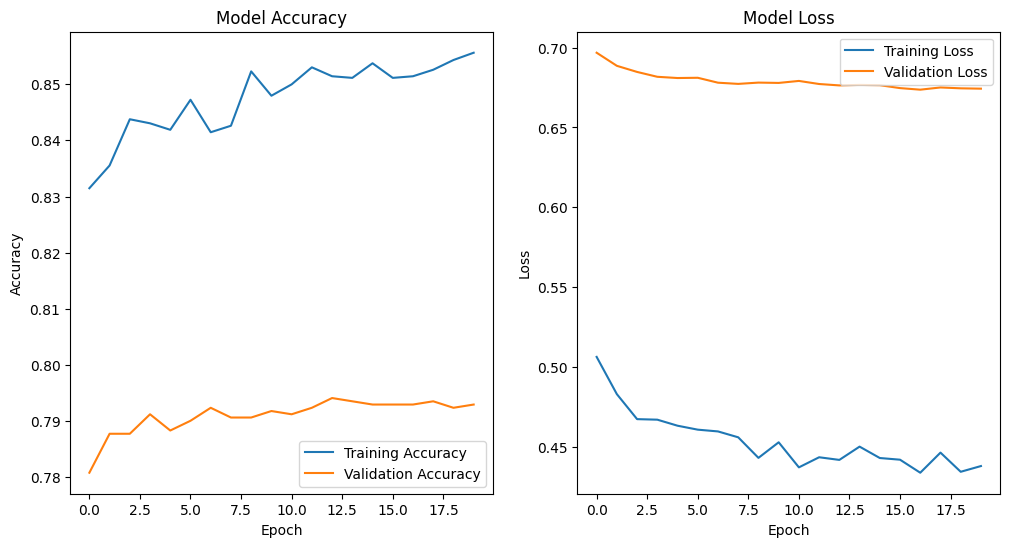

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_finetune.history['accuracy'], label='Training Accuracy')
plt.plot(history_finetune.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history_finetune.history['loss'], label='Training Loss')
plt.plot(history_finetune.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Comparing all the models

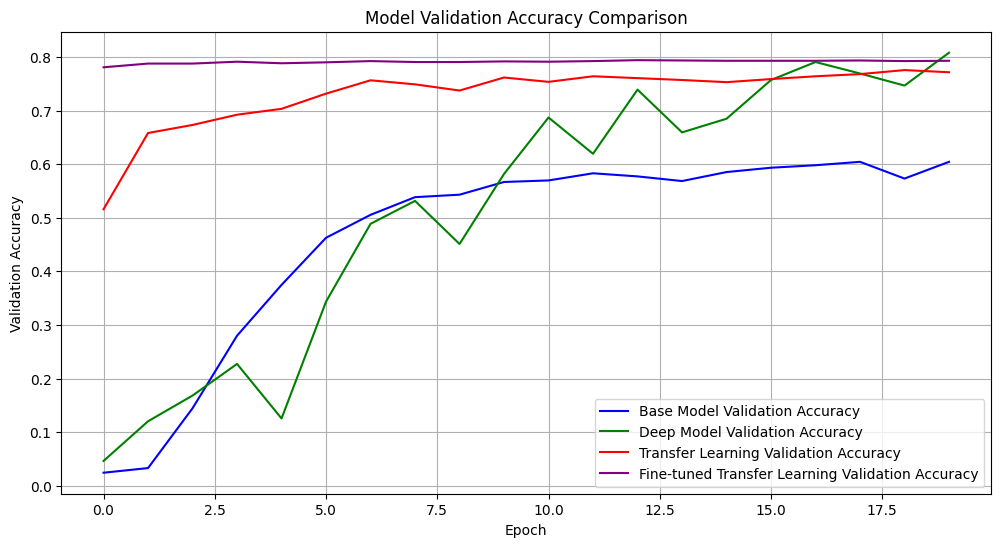

In [ ]:
# prompt: create a plot showing the accuracy of all the models, in a single plot comparing how they did in terms

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

# Plot the data for the base model
plt.plot(history.history['val_accuracy'], label='Base Model Validation Accuracy', color='blue')

# Plot the data for the deep model
plt.plot(history_deeper.history['val_accuracy'], label='Deep Model Validation Accuracy', color='green')

# Plot the data for the transfer learning model
plt.plot(history_transfer.history['val_accuracy'], label='Transfer Learning Validation Accuracy', color='red')

# Plot the data for the fine-tuned transfer learning model
plt.plot(history_finetune.history['val_accuracy'], label='Fine-tuned Transfer Learning Validation Accuracy', color='purple')


# Customize the plot
plt.title('Model Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True) # Add grid lines for better readability

# Show the plot
plt.show()


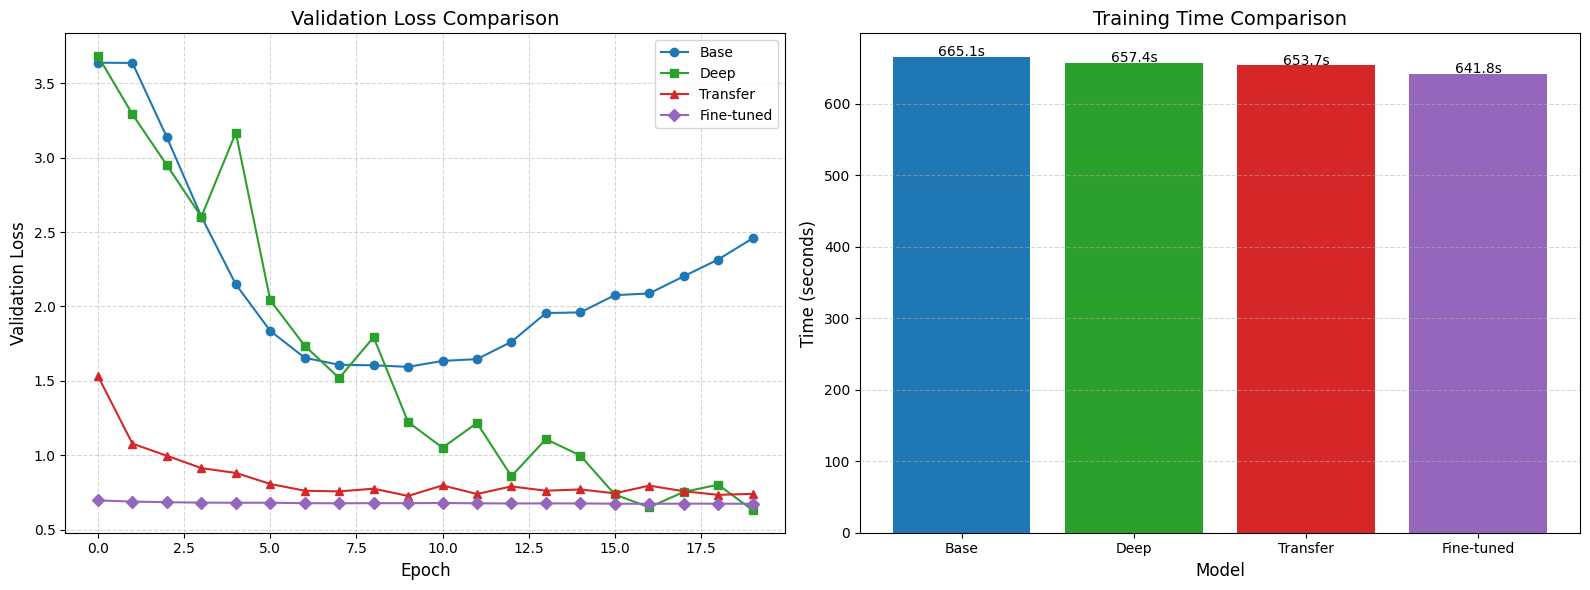

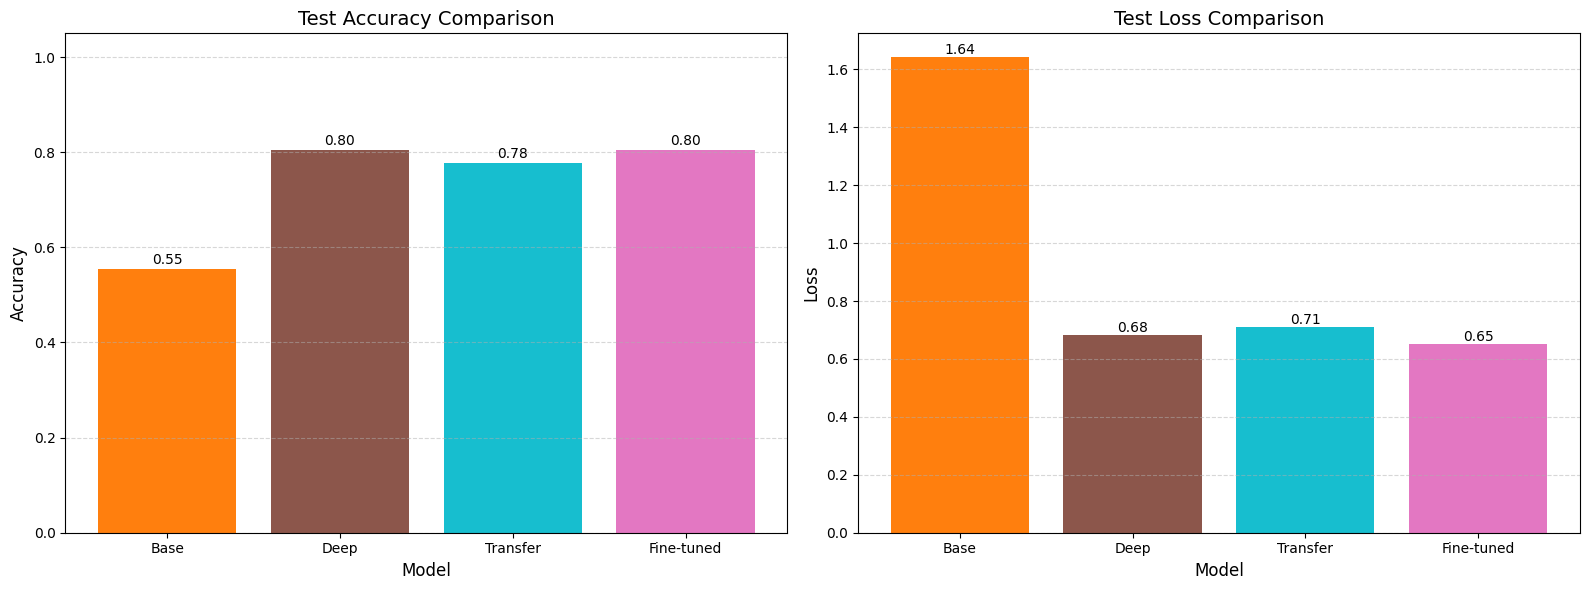

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# ----------- Define Common Variables -----------
model_names = ['Base', 'Deep', 'Transfer', 'Fine-tuned']
training_times = [training_time_basic, training_time_deeper, transfer_training_time, fine_tune_training_time]
test_accuracies = [cnn_test_accuracy, deeper_test_accuracy, transfer_test_accuracy, fine_test_accuracy]
test_losses = [cnn_test_loss, deeper_test_loss, transfer_test_loss, fine_test_loss]

# Clean and visually distinct color choices (no Seaborn)
colors_1 = ['#1f77b4', '#2ca02c', '#d62728', '#9467bd']  # Blue, Green, Red, Purple
colors_2 = ['#ff7f0e', '#8c564b', '#17becf', '#e377c2']  # Orange, Brown, Teal, Pink

# ------------------ Figure 1: Validation Loss & Training Time ------------------
fig1, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot Validation Loss
axes[0].plot(history.history['val_loss'], label='Base', color=colors_1[0], marker='o')
axes[0].plot(history_deeper.history['val_loss'], label='Deep', color=colors_1[1], marker='s')
axes[0].plot(history_transfer.history['val_loss'], label='Transfer', color=colors_1[2], marker='^')
axes[0].plot(history_finetune.history['val_loss'], label='Fine-tuned', color=colors_1[3], marker='D')
axes[0].set_title('Validation Loss Comparison', fontsize=14)
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Validation Loss', fontsize=12)
axes[0].legend(fontsize=10)
axes[0].grid(True, linestyle='--', alpha=0.5)

# Plot Training Time
bars = axes[1].bar(model_names, training_times, color=colors_1)
axes[1].set_title('Training Time Comparison', fontsize=14)
axes[1].set_xlabel('Model', fontsize=12)
axes[1].set_ylabel('Time (seconds)', fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.5)

# Annotate bars
for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.1f}s', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# ------------------ Figure 2: Accuracy & Loss ------------------
fig2, axes = plt.subplots(1, 2, figsize=(16, 6))

# Test Accuracy Bar Plot
bars = axes[0].bar(model_names, test_accuracies, color=colors_2)
axes[0].set_title('Test Accuracy Comparison', fontsize=14)
axes[0].set_xlabel('Model', fontsize=12)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].set_ylim(0, 1.05)
axes[0].grid(axis='y', linestyle='--', alpha=0.5)

for bar in bars:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.2f}', ha='center', fontsize=10)

# Test Loss Bar Plot
bars = axes[1].bar(model_names, test_losses, color=colors_2)
axes[1].set_title('Test Loss Comparison', fontsize=14)
axes[1].set_xlabel('Model', fontsize=12)
axes[1].set_ylabel('Loss', fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.5)

for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


# In this project, we explored and implemented various approaches to image classification using Convolutional Neural Networks (CNNs). Four different models were developed and evaluated:

# Base CNN Model – a simple custom architecture

# Deeper CNN Model – an extended version with more convolutional layers

# Transfer Learning Model – using pre-trained MobileNetV2 as a feature extractor

# Fine-tuned Transfer Learning Model – unfreezing selected layers of the pre-trained model for additional training

The Base Model was fast but lacked accuracy and generalization.

The Deeper Model improved accuracy but increased training time.

Transfer Learning significantly enhanced performance with minimal training time due to pre-learned features.

The Fine-tuned Model yielded the highest accuracy and lowest loss, making it the best-performing method overall.

# **Future Work and Recommendations**

Apply data augmentation to enhance generalization

Use hyperparameter tuning for better performance

Explore advanced models like EfficientNet or ResNet

Deploy as a real-time application for sign language detection

Use visual explanation tools (e.g., Grad-CAM) to interpret model decisions



